# pandas 실습(청와대 분석)


## 분석에 사용할 도구를 불러옵니다.

In [4]:
# 필요한 라이브러리를 로드합니다.
# pandas, numpy, seaborn, matplotlib


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


## 단어 추출

### 형태소 분석
- 형태소 분석이란? 형태소 보다 단위가 큰 언어 단위인 어절, 혹은 문장을 최소 의미 단위인 형태소로 분절하는 과정이다.
![image.png](https://t1.daumcdn.net/cfile/blog/992B9433598141B91B)
- https://liveyourit.tistory.com/57

### KoNLPy 설치

In [5]:
 !pip install KoNLPy

## colab 에서 한글설정하기

In [6]:
!apt -qq -y install fonts-nanum > /dev/null
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

## Seaborn 설정으로 시각화의 스타일, 폰트 설정하기 - Jupyter
* [matplotlib.pyplot.rc — Matplotlib 3.1.3 documentation](https://matplotlib.org/3.1.3/api/_as_gen/matplotlib.pyplot.rc.html)

In [7]:
# seaborn 의 set 기능을 통해 폰트, 마이너스 폰트 설정, 스타일 설정을 합니다.
# Wind : "Malgun Gothic", MAC:"AppleGothic"
import matplotlib.font_manager as fm

font_location = '/usr/share/fonts/TTF/NanumGothic.ttf'  
                    # ex - 'C:/asiahead4.ttf'
font_name = fm.FontProperties(fname = font_location).get_name()

# plt.rc("font", family="Malgun Gothic")
# plt.rc("font", family="AppleGothic")
# plt.rc("font", family="NanumGothic")
plt.rc("font", family=font_name)
plt.rc("axes", unicode_minus=False)

FileNotFoundError: ignored

In [ ]:
sns.set(font="NanumGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

* sns.set 은 기본설정이기 때문에 한번에 다해야만 함

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


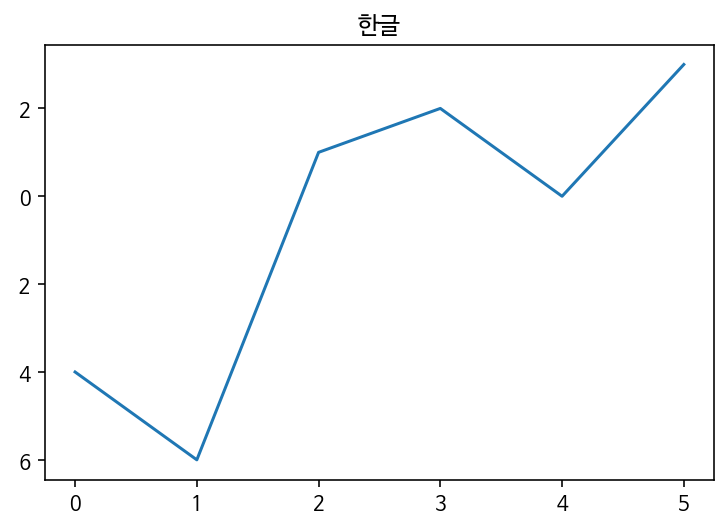

In [8]:
# 한글폰트 설정 확인을 합니다.
plt.title('한글')
plt.plot([-4,-6,1,2,0,3])



In [9]:
# 그래프가 선명하게 표시되도록 합니다.
from IPython.display import set_matplotlib_formats

set_matplotlib_formats("retina")

## petitions_scraper 불려오기
- Hyunjoong Kim 님이 만드신 petitions_scraper 을 사용합니다. 
- https://github.com/lovit/petitions_scraper

In [10]:
!rm -rf petitions_scraper_sample petitions_scraper scraping_petitions.py output index.txt
!git clone https://github.com/lovit/petitions_scraper.git petitions_scraper_sample
!mv petitions_scraper_sample/petitions_scraper .

Cloning into 'petitions_scraper_sample'...
remote: Enumerating objects: 60, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 340 (delta 31), reused 43 (delta 20), pack-reused 280
Receiving objects: 100% (340/340), 46.08 MiB | 27.21 MiB/s, done.
Resolving deltas: 100% (192/192), done.


* 국민 청원을 수직하기 위하여 scraping_petitions.py 을 가져옵니다.

In [11]:
!mv petitions_scraper_sample/scraping_petitions.py .

## petitions_scraper 테스트
- 가져온  petitions_scraper 이 동작되는지 확인합니다.

In [34]:
from petitions_scraper import parse_page

url = 'https://www1.president.go.kr/petitions/407329'
parse_page(url)

{'begin': '2018-10-15',
 'category': '경제민주화',
 'content': '금융위원회가 공모주 개인배정 축소(폐지)로 개인의 공모주 참여를 차단하려고 합니다 이와같은 금융위원회의 공모주 개인배정 축소(폐지)는 영세 개인 사업자의 골목상권을 빼앗아 가는 횡포와 같습니다. 이같은 행위는기업의 경제적 이익을 위해 개인의 밥그릇을 빼앗는 것으로 서민의 생계를 위협하는 처사입니다. 작금의 어려운 서민경제에서 가계에 조금이라도 보탬이 되고자 하는 개인 공모주 참여를 계속할 수 있도록 공모주 개인 배정 물량을 지금과 같이 할 수 있도록 꼭꼭 지켜주십시오.',
 'crawled_at': '2020-12-19 02:41:40',
 'end': '2018-11-14',
 'num_agree': 31,
 'petition_idx': '407329',
 'status': '청원종료',
 'title': '공모주 개인 배정 물량을 꼭꼭 지켜주십시오.'}

## 청와대 국민 청원 데이터 수집
- scraping_petitions.py 사용방법
  ```bash
    $ python scraping_petitions.py --first_index 추출할 시작 글번호 --last_index 추출할 마직막 글번호
  ```

In [35]:
%time !python scraping_petitions.py --first_index 594750 --last_index 594819

Stop scraping because there is no more improvement. 1 / 10 tries
CPU times: user 2.67 ms, sys: 16 ms, total: 18.7 ms
Wall time: 331 ms


- 수집결과는 output 폴더에 저장됩니다.

In [36]:
!ls -l output/

total 376
-rw-r--r-- 1 root root  2405 Dec 19 02:30 594750.json
-rw-r--r-- 1 root root  1109 Dec 19 02:30 594751.json
-rw-r--r-- 1 root root  3030 Dec 19 02:30 594752.json
-rw-r--r-- 1 root root 10382 Dec 19 02:30 594753.json
-rw-r--r-- 1 root root   708 Dec 19 02:30 594754.json
-rw-r--r-- 1 root root  1887 Dec 19 02:30 594755.json
-rw-r--r-- 1 root root  2282 Dec 19 02:30 594756.json
-rw-r--r-- 1 root root  3592 Dec 19 02:30 594757.json
-rw-r--r-- 1 root root  2196 Dec 19 02:30 594758.json
-rw-r--r-- 1 root root  1787 Dec 19 02:30 594759.json
-rw-r--r-- 1 root root  1363 Dec 19 02:30 594760.json
-rw-r--r-- 1 root root  2875 Dec 19 02:30 594761.json
-rw-r--r-- 1 root root  7153 Dec 19 02:30 594762.json
-rw-r--r-- 1 root root  3475 Dec 19 02:30 594763.json
-rw-r--r-- 1 root root  2684 Dec 19 02:31 594764.json
-rw-r--r-- 1 root root  3857 Dec 19 02:31 594765.json
-rw-r--r-- 1 root root  2913 Dec 19 02:31 594766.json
-rw-r--r-- 1 root root  4649 Dec 19 02:31 594767.json
-rw-r--r-- 1 root 

## 결과 파일을 dataframe 에 적재
- output 폴더내의 있는 파일들을 읽어옵니다.

In [37]:
import json
from os import listdir
from os.path import isfile, join
import pandas as pd

In [38]:
onlyfiles = [f for f in listdir("output") if isfile(join("output", f))]
onlyfiles[:5]

['594773.json', '594793.json', '594777.json', '594797.json', '594801.json']

- 파일명이 들어있는 리스트를 이용하여 json 을 읽어업니다.

In [39]:
def read_json(filename):    
    path = f"output/{filename}"
    res = json.load(open(path, encoding="utf-8"))
    return res

In [40]:
json_list_data = list(map(read_json, onlyfiles))
json_list_data[:5]

[{'begin': '2020-12-17',
  'category': '일자리',
  'content': '1. 3단계 요건이 됐는데 불구 (3단계 상향조정을 떠나서) 시험 강행 이유가 납득되지 않습니다. 2. 고사장 창문 개방한다는 말이 있는데 이 추운 날씨 추위속에서 시험을 보라는건지 의문스럽습니다. 3. 글쓴 본인은 고사장이 가깝지만, 다른 지역인 예를들어 부산에 사시는분들은 김해 고사장 받으신분들도 계십니다. 무리하게 강행하는 것보다 신중하게 검토해 볼 필요 있지 않을까요? 3단계 상향조정하라는게 아닙니다. 3단계 신중검토 처럼 이것도 신중하게 검토해 볼 필요가 있다고 봅니다. 여러분들 의견은 어떠신가요? [본 게시물의 일부 내용이 국민 청원 요건에 위배되어 관리자에 의해 수정되었습니다]',
  'crawled_at': '2020-12-19 02:31:15',
  'end': '2021-01-16',
  'num_agree': 178,
  'petition_idx': '594773',
  'status': '청원진행중',
  'title': '**은행 시험 연기 & 특별대안'},
 {'begin': '2020-12-18',
  'category': '경제민주화',
  'content': '우리 현대엠엔소프트 소액주주들은 미래차 자율주행 패러다임 대전환의 시대를 맞아 현대차 그룹의 미래를 긍정적으로 보고, 특히, 본격적인 3세 경영시대를 맞이하여 그룹 내 모빌리티 전문회사인 현대엠엔소프트를 장기보유하며, 직상장을 기대하고 응원하던 주주들입니다.\u200b 그런데, 최근 불공정한 합병결정으로 소액주주들에게 크나큰 피해가 생겨 다음과 같은 청원을 상서합니다. \u200b --------------------- 다 음 ---------------------- 먼저, 현대차그룹 정의선회장의 취임 후 첫 작품인 이번 합병에서 무리하게 소액주주의 집단반발을 사면서까지 국내 최고의 정밀지도 자율주행회사이자, 유니콘기업으로 기대받던 현대엠엔소프트를 헐값인 3천6백억대에

- 리스트 형 변수를 데이터 프레임으로 변환합니다.

In [41]:
#pd.DataFrame?
jsondf = pd.DataFrame(data=json_list_data)
jsondf.shape

(70, 9)

- 추출된 결과에서 동의수순으로 정리하여 상위 10개의 청원분들을 출력합니다.

In [42]:
jsondf.sort_values(by=["num_agree"],ascending=False).head(10)

,crawled_at,category,begin,end,content,num_agree,petition_idx,status,title
44,2020-12-19 02:30:59,반려동물,2020-12-17,2021-01-16,"11월 20일 금요일 새벽 5시 20분경, 피해자는 영업이 끝난 가게에서 난동을 부...",37866,594763,청원진행중,강아지 납치범을 엄벌에 처해주세요
55,2020-12-19 02:32:10,인권/성평등,2020-12-18,2021-01-17,저는 경기도 지역 국공립 어린이집 보육교사입니다. 계속되는 코로나19로 인해 국민들...,27524,594808,청원진행중,보육교사를 잠정적 코로나 확진자로 취급하는 시군구청과 보건복지부의 횡포를 멈춰주시고...
7,2020-12-19 02:32:03,보건복지,2020-12-18,2021-01-17,안녕하세요. 서울시 거주하는 보육교직원입니다. 일단 코로나 검사 무료 검사 받게 된...,20912,594804,청원진행중,서울시 보육교직원 코로나 검사 실시 관련 민원 제기합니다.
25,2020-12-19 02:30:40,정치개혁,2020-12-17,2021-01-16,"추미애 장관은 권력구조 개혁의 핵심 법무부 장관으로서 누구보다 공정하고, 민주주의 ...",18515,594751,청원진행중,대통령님 추미애 장관의 사의를 반려해 주세요.
47,2020-12-19 02:30:48,정치개혁,2020-12-17,2021-01-16,헌법정신을 유린하고 법치주의를 훼손한 문재인 대통령을 탄핵하여야 합니다. 12월16...,18388,594756,청원진행중,헌법정신을 유린하고 법치주의를 훼손한 문재인대통령을 탄핵하여야 합니다
29,2020-12-19 02:32:02,정치개혁,2020-12-18,2021-01-17,1. 온가족이 멸문지화의 형국으로 난도질을 당했습니다. 뒤를 이은 사람은 수 년전 ...,12941,594803,청원진행중,추미애 장관은 반드시 유임되어야 합니다.
10,2020-12-19 02:32:18,육아/교육,2020-12-18,2021-01-17,안녕하십니까? 안산시에서 아이들과 함께 생활하는보육교사입니다. 보육교직원은 코로나1...,10689,594813,청원진행중,안산시 보육시설 코로나 전수검사 실시 철회해주세요.
4,2020-12-19 02:31:59,정치개혁,2020-12-18,2021-01-17,추미애 장관의 사표를 반려해 주시기를 간곡하게 청원드립니다. 대통령님께 드리는 호소...,9705,594801,청원진행중,추미애 장관의 사표를 반려해 주시기를 간곡하게 청원드립니다
69,2020-12-19 02:31:56,정치개혁,2020-12-18,2021-01-17,용장을 기용하는 의로운 리더 문재인 대통령님께 경의를 표합니다. 추미애 장관님의 사...,7582,594799,청원진행중,추미애 장관 사퇴 철회 청원
23,2020-12-19 02:30:42,정치개혁,2020-12-17,2021-01-16,❤문재인대통령님~ <긴급청원문> ●윤석열 해임에 걸림돌 사라졌습니다 대통령님 ~! ...,7457,594752,청원진행중,대통령님 윤석열 검찰총장을 해임시켜주십시요.


- 오늘 날짜의 청원문들을 추출합니다.

In [43]:
df = jsondf[jsondf["begin"] == "2020-12-18"].copy()
df.shape

(40, 9)

- category 별로 countplot 

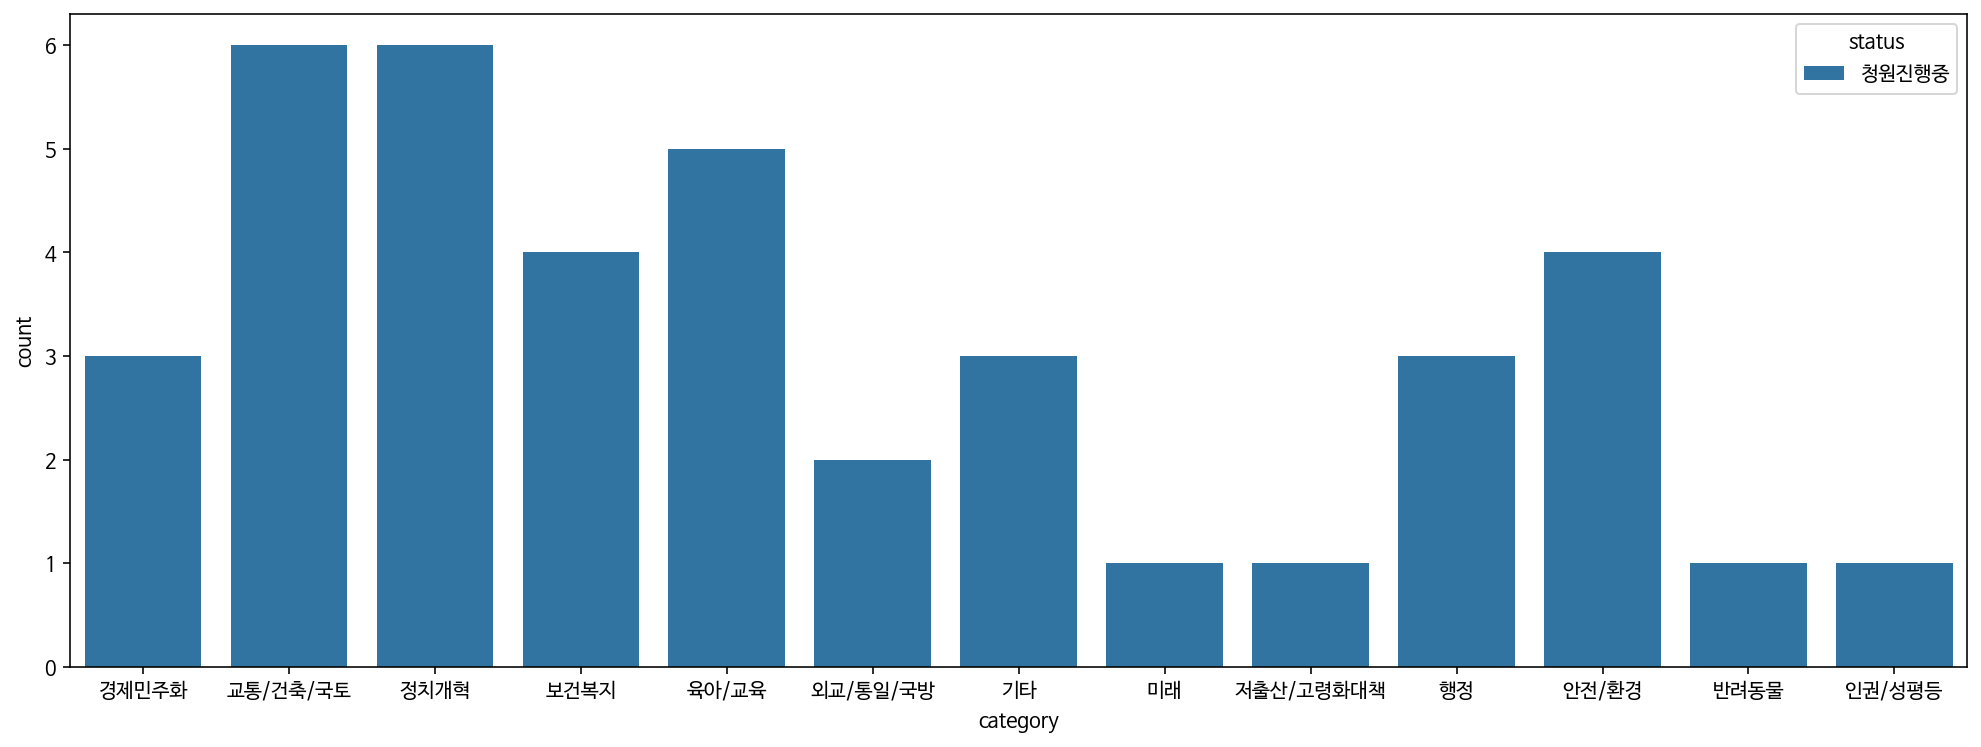

In [44]:
plt.figure(figsize=(17,6))
sns.countplot(data=df, x="category", hue="status")

### 형태소 분석
- 형태소 분석이란? 형태소 보다 단위가 큰 언어 단위인 어절, 혹은 문장을 최소 의미 단위인 형태소로 분절하는 과정이다.
![image.png](https://t1.daumcdn.net/cfile/blog/992B9433598141B91B)
- https://liveyourit.tistory.com/57

In [45]:
import jpype
import konlpy
from konlpy.tag import Okt

# Okt 객체 선언
okt = Okt()

In [26]:
def get_nouns(phrase):
    result = okt.nouns(phrase)
    result = list(filter(lambda x: len(x) > 1, result))
    return ",".join(result)

- 추출된 결과에서 content 만 출력하고 이를 형태소 분석을 해서 keyword 에 저장합니다.

In [46]:
%time df['keyword'] = df["content"].map(get_nouns)

CPU times: user 4.02 s, sys: 38.8 ms, total: 4.06 s
Wall time: 3.39 s


In [47]:
df.head()

,crawled_at,category,begin,end,content,num_agree,petition_idx,status,title,keyword
1,2020-12-19 02:31:46,경제민주화,2020-12-18,2021-01-17,우리 현대엠엔소프트 소액주주들은 미래차 자율주행 패러다임 대전환의 시대를 맞아 현대...,297,594793,청원진행중,"현대엠엔소프트와 현대오토에버, 불공정한 합병비율 개선이 필요합니다","우리,소프트,소액,주주,미래,자율,주행,패러다임,전환,시대,현대차,그룹,미래,긍정,..."
3,2020-12-19 02:31:53,교통/건축/국토,2020-12-18,2021-01-17,안녕하세요. *** **** 차량을 구입한지 이제 2개월 지난 고객입니다. 차량을 ...,136,594797,청원진행중,*** ******* 차량 인포시스템 먹통 관련 전수조사 요청합니다,"차량,구입,한지,이제,개월,지난,고객,차량,인수,정도,갑자기,차량,인포,메이,시스템..."
4,2020-12-19 02:31:59,정치개혁,2020-12-18,2021-01-17,추미애 장관의 사표를 반려해 주시기를 간곡하게 청원드립니다. 대통령님께 드리는 호소...,9705,594801,청원진행중,추미애 장관의 사표를 반려해 주시기를 간곡하게 청원드립니다,"추미애,장관,사표,반려,시기,간곡,청원,대통령,소문,존경,문재인,대통령,소생,지난,..."
7,2020-12-19 02:32:03,보건복지,2020-12-18,2021-01-17,안녕하세요. 서울시 거주하는 보육교직원입니다. 일단 코로나 검사 무료 검사 받게 된...,20912,594804,청원진행중,서울시 보육교직원 코로나 검사 실시 관련 민원 제기합니다.,"서울시,거주,보육,교직원,일단,코로나,검사,무료,검사,공문,보건복지부,소속,어린이집..."
8,2020-12-19 02:32:25,보건복지,2020-12-18,2021-01-17,(2020년12월16일 시사뉴스 온라인뉴스에 박성태 칼럼으로 제재된 내용을 보완한 ...,384,594818,청원진행중,"무너진 K방역, 되살릴 수 있는 방법 긴급제안한다.","시사,뉴스,온라인,뉴스,박성태,칼럼,제재,내용,보완,박성태,칼럼,방역,방법,긴급,제..."


- 동의수 순으로 정렬해서 상위 10개만 추출하고 keyword 을 문자열화 하여 fac 에 저장합니다. 

In [48]:
fac = ",".join(df.sort_values(by=["num_agree"],ascending=False).head(10).loc[df["keyword"].notnull(), "keyword"])
fac[:100]

'경기도,지역,공립,어린이집,보육,교사,계속,코로나,국민,모두,나날,가운데,포함,보육,교사,또한,호소,청원,구청,보건복지부,횡포,부분,유감,긴급,보육,시작,보육,교사,코로나,대응,지'

- fac 변수에서 단어 빈도수들을 분석합니다.

In [49]:
fac_count = pd.Series(fac.split(",")).value_counts()
fac_count.head()

보육    44
교사    27
검찰    23
장관    23
검사    16
dtype: int64

- 상위 50개 단어에 대해 막대그래프를 그려봅니다.

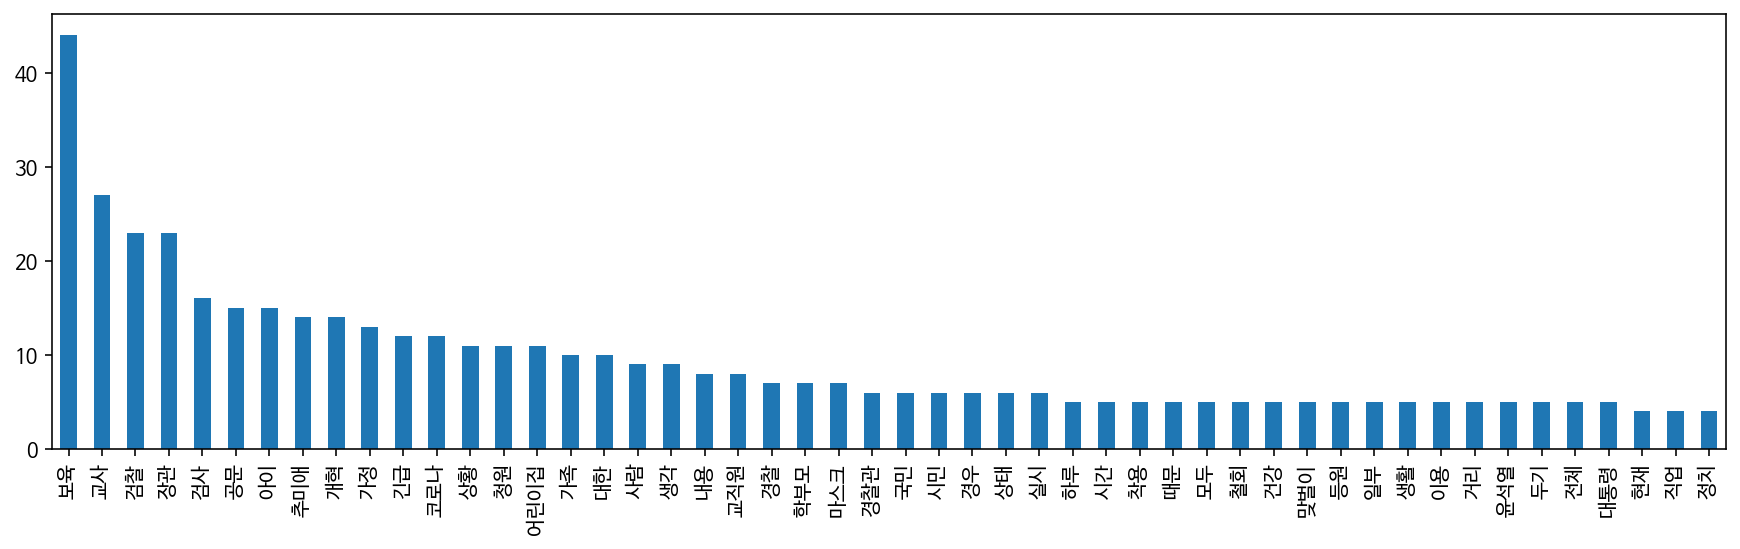

In [50]:
# 상위 50개 단어에 대해 막대그래프를 그려봅니다.

fac_count.head(50).plot.bar(figsize=(15, 4))

- wordcloud 을 위하여 메소드를 만듭니다.

In [51]:
# 공식문서의 튜토리얼을 보고 wordcloud를 그리는 함수를 만들어 봅니다.
# 이때 폰트 설정시 폰트명이 아닌 폰트의 설치 경로를 입력해 주셔야 합니다.
# 윈도우 : r"C:\Windows\Fonts\malgun.ttf" 해당 경로에 폰트가 있는지 확인을 해주세요.
# 맥 : r"/Library/Fonts/AppleGothic.ttf"
# 나눔고딕 등의 폰트를 설치했다면 : '/Library/Fonts/NanumBarunGothic.ttf'


from wordcloud import WordCloud

def wordcloud(data, width=1200, height=500):
    word_draw = WordCloud(
        font_path=r"/Library/Fonts/NanumBarunGothic.ttf",
        width=width, height=height,
        stopwords=["것", "수", "제","저","대해","등","이"], 
        background_color="white",
        random_state=42
    )
    word_draw.generate(data)

    plt.figure(figsize=(15, 7))
    plt.imshow(word_draw)
    plt.axis("off")
    plt.show()

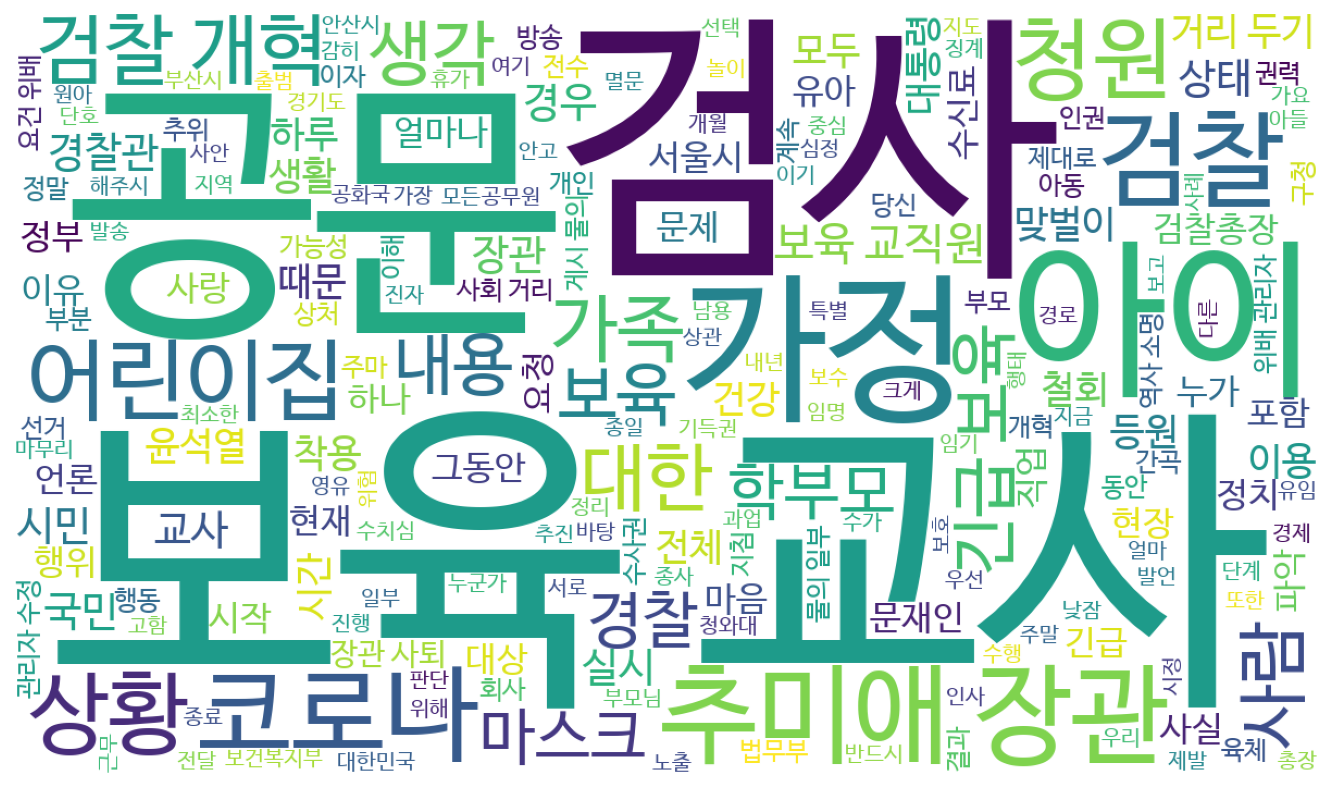

In [52]:
# 위에서 만든 함수에 전처리한 text인 fac을 넣어 그려봅니다.


wordcloud(fac, width=1200, height=700)